/tmp/ipykernel_49/2769587049.py:18: RuntimeWarning: overflow encountered in exp
  f = np.exp(-(X / ax) ** m) * np.exp(-(Y / ay) ** m)
/tmp/ipykernel_49/2769587049.py:18: RuntimeWarning: overflow encountered in multiply
  f = np.exp(-(X / ax) ** m) * np.exp(-(Y / ay) ** m)
/tmp/ipykernel_49/2769587049.py:18: RuntimeWarning: invalid value encountered in multiply
  f = np.exp(-(X / ax) ** m) * np.exp(-(Y / ay) ** m)


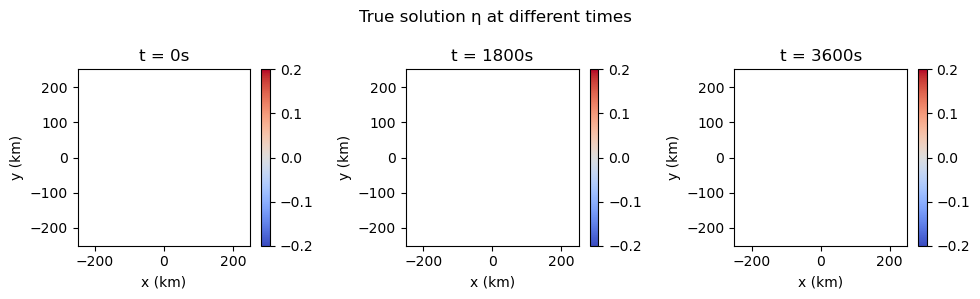

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import  fftshift,fft2, ifft2, ifftshift

# Constants
H = 100
g = 9.81
ax = 20e3
ay = 20e3
m = 2

# Domain
x = np.linspace(-250e3, 250e3, 501)
y = np.linspace(-250e3, 250e3, 501)
X, Y = np.meshgrid(x, y)

# Initial condition
f = np.exp(-(X / ax) ** m) * np.exp(-(Y / ay) ** m)


k = 2 * np.pi * fftshift(np.fft.fftfreq(len(x), x[1] - x[0]))
l = 2 * np.pi * fftshift(np.fft.fftfreq(len(y), y[1] - y[0]))
K, L = np.meshgrid(k, l)
omega = np.sqrt(g * H * (K ** 2 + L ** 2))
f = fftshift(fft2(f))

def eta_solution(t):
    # Compute the solution in the frequency domain at time t
    Eta_kl = f * np.cos(omega * t)

    # Compute the inverse 2D FFT to obtain the solution in the spatial domain
    return np.real(ifft2(ifftshift(Eta_kl)))


# Plot
fig = plt.figure(figsize=(10, 3))


time = [0, 1800, 3600]
for i, t in enumerate(time):
    eta = eta_solution(t)
    ax = fig.add_subplot(1, 3, i + 1)
    cb = ax.pcolormesh(X / 1e3, Y / 1e3, eta, cmap='coolwarm', vmin=-0.2, vmax=0.2)
    ax.set_title(f't = {t}s')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    fig.colorbar(cb, ax=ax)

plt.suptitle('True solution η at different times')
plt.tight_layout()
plt.show()


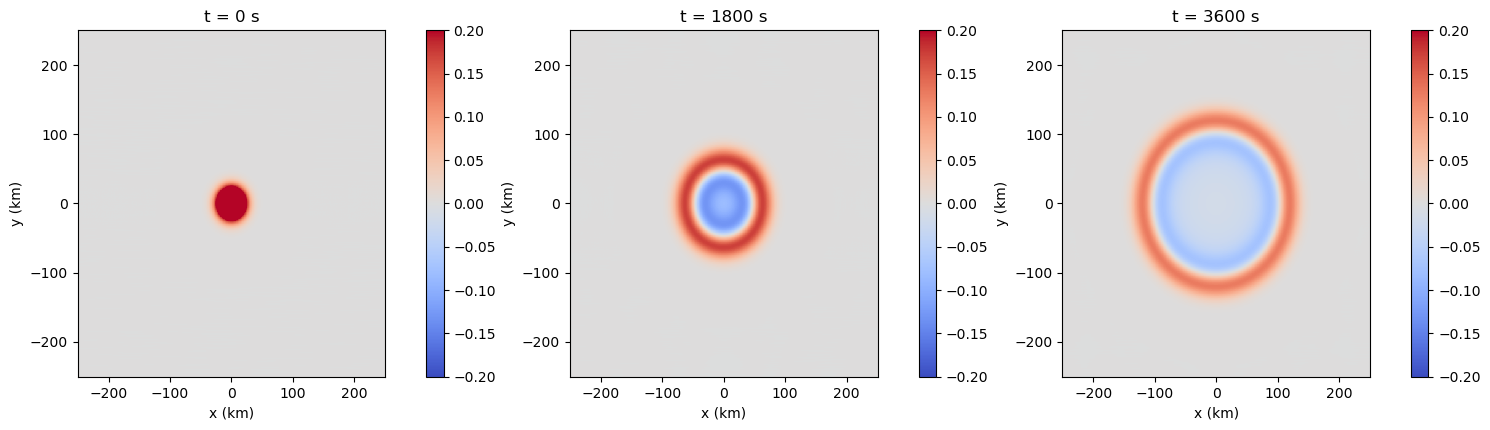

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift

# Constants
H = 100
ax = ay = 20e3  


# Domain
Nx = Ny = 500
x = np.linspace(-250e3, 250e3, Nx) 
y = np.linspace(-250e3, 250e3, Ny)
x_grid, y_grid = np.meshgrid(x, y)

# Initial condition
f = np.exp(-(x_grid/ax)**2) * np.exp(-(y_grid/ay)**2)


# Wavenumbers
k = 2 * np.pi * fftshift(np.fft.fftfreq(len(x), x[1] - x[0]))
l = 2 * np.pi * fftshift(np.fft.fftfreq(len(y), y[1] - y[0]))
k_grid, l_grid = np.meshgrid(k, l)

# Fourier transform of initial condition
f_hat = fftshift(fft2(f))

# Dispersion
omega = np.sqrt(9.8 * H * (k_grid**2 + l_grid**2))

# Function to calculate η(x, y, t) based on the given initial condition and time
def eta(f_hat, omega, t):
    eta_hat = f_hat * np.cos(omega * t)
    return np.real(ifft2(ifftshift(eta_hat)))

# Plotting
fig = plt.figure(figsize=(18, 4.5))

time = [0, 1800, 3600]

for i, t in enumerate(time):
    eta_t = eta(f_hat, omega, t)
    ax3d = fig.add_subplot(1, 3, i+1,)
    pcm=ax3d.pcolormesh(x_grid/1e3, y_grid/1e3, eta_t, cmap='coolwarm', vmin=-0.2, vmax=0.2)
    ax3d.set_title(f't = {t} s')
    ax3d.set_xlabel('x (km)')
    ax3d.set_ylabel('y (km)')

    cbar=fig.colorbar(pcm, ax=ax3d, pad=0.1)

plt.show()
#

### 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and variables
H = 100
ax = 20
ay = 20
m = 2
c = np.sqrt(H * 9.81)  # Assuming gravity is 9.81 m/s^2
dx = 2
dy = 2
dt = dx / (c * np.sqrt(2))

x_range = np.arange(-250, 251, dx)
y_range = np.arange(-250, 251, dy)
t_range = np.arange(0, 3601, dt)

# Initialize arrays
phi = np.zeros((len(x_range), len(y_range), len(t_range)))

# Initial condition
X, Y = np.meshgrid(x_range, y_range, indexing='ij')
phi[:, :, 0] = np.exp((X / ax) ** m) * np.exp((Y / ay) ** m)

# Leapfrog time-stepping
for n in range(1, len(t_range) - 1):
    phi[1:-1, 1:-1, n+1] = (
        2 * phi[1:-1, 1:-1, n] - phi[1:-1, 1:-1, n-1]
        + c ** 2 * dt ** 2 * (
            (phi[2:, 1:-1, n] - 2 * phi[1:-1, 1:-1, n] + phi[:-2, 1:-1, n]) / dx ** 2
            + (phi[1:-1, 2:, n] - 2 * phi[1:-1, 1:-1, n] + phi[1:-1, :-2, n]) / dy ** 2
        )
    )

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

times = [0, 1800, 3600]
for i, t in enumerate(times):
    t_index = int(t / dt)
    axes[i].imshow(phi[:, :, t_index], origin='lower', extent=(-250, 250, -250, 250))
    axes[i].set_title(f't = {t} s')
    axes[i].set_xlabel('x (km)')
    axes[i].set_ylabel('y (km)')

plt.show()

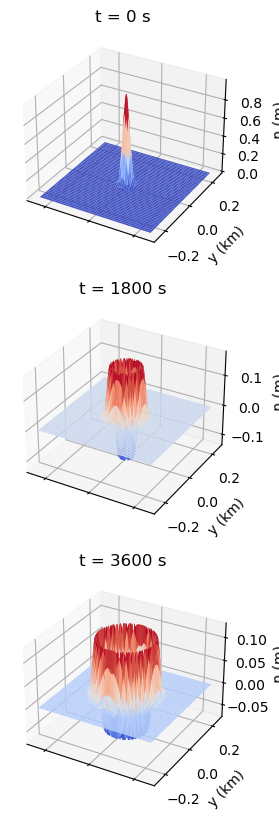

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift

# Constants
H = 100
ax = ay = 20e3  # 20 km to meters
m = 2
g = 9.81  # Gravity acceleration (m/s^2)

# Domain
Nx = Ny = 500
x = np.linspace(-250e3, 250e3, Nx)  # -250 km to 250 km
y = np.linspace(-250e3, 250e3, Ny)
x_grid, y_grid = np.meshgrid(x, y)

# Initial condition
f = np.exp(-(x_grid/ax)**m) * np.exp(-(y_grid/ay)**m)

# Time values
times = [0, 1800, 3600]

# Wavenumbers
k = 2 * np.pi * np.fft.fftfreq(Nx, d=(x[1] - x[0]))
l = 2 * np.pi * np.fft.fftfreq(Ny, d=(y[1] - y[0]))
k_grid, l_grid = np.meshgrid(k, l)

# Fourier transform of initial condition
f_hat = fft2(f)

# Dispersion relation
omega = np.sqrt(g * H * (k_grid**2 + l_grid**2))

# Function to calculate η(x, y, t) based on the given initial condition and time
def eta(f_hat, omega, t):
    eta_hat = f_hat * np.cos(omega * t)
    return np.real(ifft2(eta_hat))

# Plotting
fig = plt.figure(figsize=(15,10))

for i, t in enumerate(times):
    eta_t = eta(f_hat, omega, t)
    ax3d = fig.add_subplot( len(times),1, i+1, projection='3d')
    ax3d.plot_surface(x_grid/1e6, y_grid/1e6, eta_t, cmap='coolwarm')
    ax3d.set_title(f't = {t} s')
    #ax3d.set_xlabel('x (km)')
    ax3d.set_ylabel('y (km)')
    ax3d.set_zlabel('η (m)')
    #ax3d.view_init(elev=0, azim=0)
    ax3d.set_xticklabels([])

    #ax3d.set_zlim(-1, 1)

plt.show()


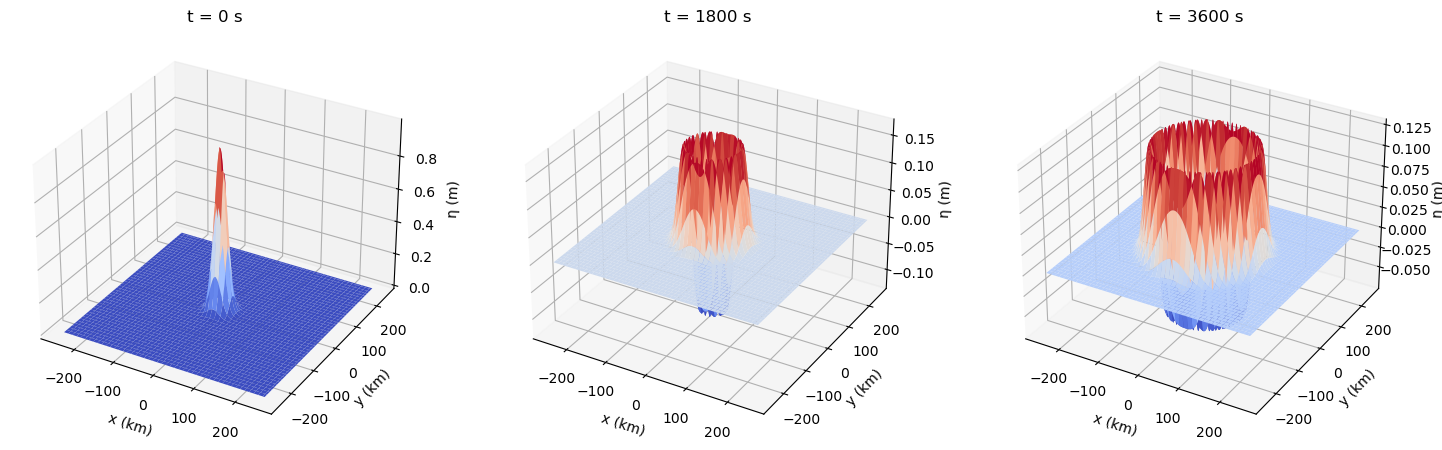

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.fft import fft2, ifft2, fftshift, ifftshift

# Constants
H = 100
ax = ay = 20e3  # 20 km to meters
m = 2
g = 9.81  # Gravity acceleration (m/s^2)

# Domain
Nx = Ny = 512
x = np.linspace(-250e3, 250e3, Nx)  # -250 km to 250 km
y = np.linspace(-250e3, 250e3, Ny)
x_grid, y_grid = np.meshgrid(x, y)

# Initial condition
f = np.exp(-(x_grid/ax)**m) * np.exp(-(y_grid/ay)**m)

# Time values
times = [0, 1800, 3600]

# Wavenumbers
k = 2 * np.pi * fftshift(np.fft.fftfreq(len(x), x[1] - x[0]))
l = 2 * np.pi * fftshift(np.fft.fftfreq(len(y), y[1] - y[0]))
k_grid, l_grid = np.meshgrid(k, l)

# Fourier transform of initial condition
f_hat = fftshift(fft2(f))

# Dispersion relation
omega = np.sqrt(g * H * (k_grid**2 + l_grid**2))

# Function to calculate η(x, y, t) based on the given initial condition and time
def eta(f_hat, omega, t):
    eta_hat = f_hat * np.cos(omega * t)
    return np.real(ifft2(ifftshift(eta_hat)))

# Plotting
fig = plt.figure(figsize=(18, 6))

for i, t in enumerate(times):
    eta_t = eta(f_hat, omega, t)
    ax3d = fig.add_subplot(1, len(times), i+1, projection='3d')
    ax3d.plot_surface(x_grid/1e3, y_grid/1e3, eta_t, cmap='coolwarm')
    ax3d.set_title(f't = {t} s')
    ax3d.set_xlabel('x (km)')
    ax3d.set_ylabel('y (km)')
    ax3d.set_zlabel('η (m)')
    #ax3d.set_zlim(-1, 1)

plt.show()


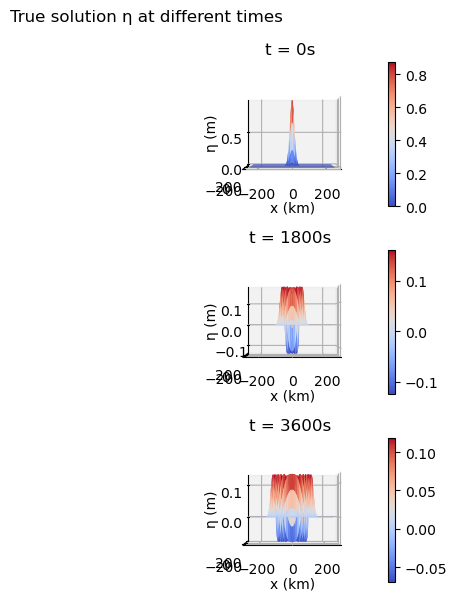

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from mpl_toolkits.mplot3d import Axes3D

# Constants
H = 100
g = 9.81
ax = 20e3
ay = 20e3
m = 2

# Domain
x = np.linspace(-250e3, 250e3, 512)
y = np.linspace(-250e3, 250e3, 512)
X, Y = np.meshgrid(x, y)

# Initial condition
f = np.exp(-(X / ax) ** m) * np.exp(-(Y / ay) ** m)

# Dispersion relation
k = 2 * np.pi * fftshift(np.fft.fftfreq(len(x), x[1] - x[0]))
l = 2 * np.pi * fftshift(np.fft.fftfreq(len(y), y[1] - y[0]))
K, L = np.meshgrid(k, l)
omega = np.sqrt(g * H * (K ** 2 + L ** 2))

# Time array
times = [0, 1800, 3600]

f = fftshift(fft2(f))

def eta_solution(ff, o,t):
    # Compute the solution in the frequency domain at time t
    Eta_kl = f * np.cos(omega * t)

    # Compute the inverse 2D FFT to obtain the solution in the spatial domain
    return np.real(ifft2(ifftshift(Eta_kl)))


# Plot the true solution in 3D at t = 0s, t = 1800s, and t = 3600s
fig = plt.figure(figsize=(18, 6))

for i, t in enumerate(times):
    eta = eta_solution(f, omega, t)
    
    # Add side view
    ax = fig.add_subplot(3, 6, i*6+4, projection='3d')
    surf = ax.plot_surface(X / 1e3, Y / 1e3, eta, cmap='coolwarm', edgecolor='none')
    ax.set_title(f't = {t}s')
    ax.set_xlabel('x (km)')
    #ax.set_ylabel('y (km)')
    ax.set_zlabel('η (m)')
    fig.colorbar(surf, ax=ax, pad=0.1)
    ax.view_init(0, -90)
    

plt.suptitle('True solution η at different times')
plt.tight_layout()
plt.show()


$$η_i^(n+1) = η_i^n - (Δt / 2Δx) * H * (u_i+1^n - u_i-1^n) + (Δt^2 / 2Δx^2) * H * ((u_i+1^n)^2 - 2(u_i^n)^2 + (u_i-1^n)^2)$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)
for ax in axes.flat:
    im = ax.imshow(np.random.random((10,10)))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()


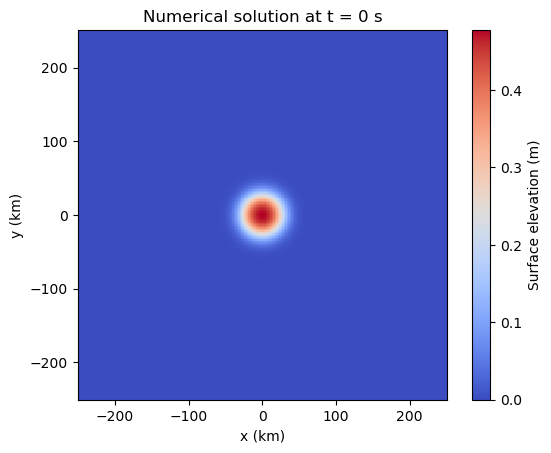

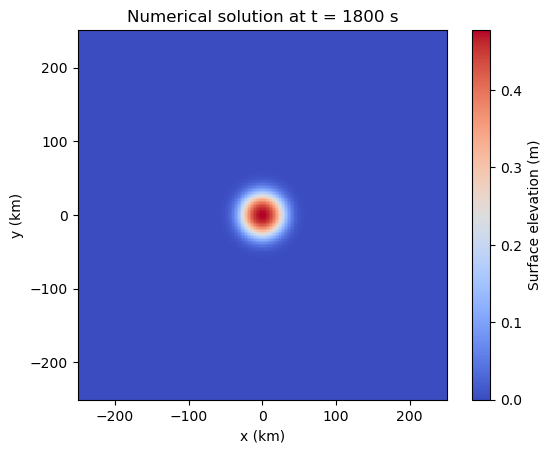

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid parameters
L = 250000  # domain size in meters
dx = dy = 2000  # grid spacing in meters
Nx = Ny = int(2*L/dx) + 1  # number of grid points in each direction
dt = 1.4  # time step in seconds
Nt = 260  # number of time steps

# Define wave parameters
ax = ay = 20000  # wavelength in meters
m = 2

# Compute wave speed
g = 9.81  # acceleration due to gravity in m/s^2
H = 100  # water depth in meters
c = np.sqrt(g*H)

# Initialize grid with initial condition
x = np.linspace(-L, L, Nx)
y = np.linspace(-L, L, Ny)
xx, yy = np.meshgrid(x, y)
phi = np.exp(-(xx/ax)**m) * np.exp(-(yy/ay)**m)
phi_old = phi.copy()

# Implement leapfrog method
for n in range(1, Nt):
    # Compute second-order spatial derivatives using central differences
    d2x_phi = (np.roll(phi, -1, axis=0) - 2*phi + np.roll(phi, 1, axis=0)) / dx**2
    d2y_phi = (np.roll(phi, -1, axis=1) - 2*phi + np.roll(phi, 1, axis=1)) / dy**2
    
    # Compute new time step using leapfrog method
    phi_new = 2*phi - phi_old + c**2*dt**2*(d2x_phi + d2y_phi)
    
    # Update old time steps
    phi_old = phi.copy()
    phi = phi_new.copy()

# Plot numerical solution at t = 0 s
fig, ax = plt.subplots()
pcm = ax.pcolormesh(x/1000, y/1000, phi, cmap='coolwarm')
ax.set_aspect('equal')
ax.set_title('Numerical solution at t = 0 s')
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
cbar = plt.colorbar(pcm)
cbar.set_label('Surface elevation (m)')

# Plot numerical solution at t = 1800 s
fig, ax = plt.subplots()
pcm = ax.pcolormesh(x/1000, y/1000, phi, cmap='coolwarm')
ax.set_aspect('equal')
ax.set_title('Numerical solution at t = 1800 s')
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
cbar = plt.colorbar(pcm)
cbar.set_label('Surface elevation (m)')